In [ ]:
#!pip3 install twilio

In [40]:
#Importamos sistema operativo, la api rest de twilio, la configuración hecha por nosotros para usar la api de twilio
#Tambien importamos json dado que lo necesitaremos
import os
from twilio.rest import Client
from twilio_config import TWILIO_ACCOUNT_SID, TWILIO_AUTH_TOKEN, PHONE_NUMBER, API_KEY_WAPI
import json
print(TWILIO_ACCOUNT_SID)
print(TWILIO_AUTH_TOKEN)
print(PHONE_NUMBER)
print(API_KEY_WAPI)

AC3a7eb4f5e96001b1139d3b6aba50b21f
84f88fe4910eb70e2ddf442bdc5f25d4
+17432224721
40797fb78440446ea97162227231601


In [2]:
import time
#Importamos requests para usos del api
#Esta librería se encarga de obtener respuestas que se realizan en el protoloco HTTP de una plataforma web que se haya establecido con anterioridad con una API.
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

In [3]:
#importamos pandas, importamos requests, beautifulSoup y tqdm
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm


from datetime import datetime

# ARMADO DE LA URL

In [4]:
query = 'Bogotá'
api_key = API_KEY_WAPI
url_clima = 'https://api.weatherapi.com/v1/forecast.json?key='+api_key+'&q='+query+'&days=1&aqi=no&alerts=no'

In [5]:
#Llamado al API para que nos responda y esa respuesta la convertimos en un JSON
response = requests.get(url_clima).json()

In [6]:
#Ver que me trajo la api
response

{'location': {'name': 'Bogotá',
  'region': 'Cundinamarca',
  'country': 'Kolumbien',
  'lat': 4.6,
  'lon': -74.08,
  'tz_id': 'America/Bogota',
  'localtime_epoch': 1673974426,
  'localtime': '2023-01-17 11:53'},
 'current': {'last_updated_epoch': 1673973900,
  'last_updated': '2023-01-17 11:45',
  'temp_c': 16.0,
  'temp_f': 60.8,
  'is_day': 0,
  'condition': {'text': 'Partly cloudy',
   'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
   'code': 1003},
  'wind_mph': 5.6,
  'wind_kph': 9.0,
  'wind_degree': 320,
  'wind_dir': 'NW',
  'pressure_mb': 1027.0,
  'pressure_in': 30.33,
  'precip_mm': 0.0,
  'precip_in': 0.0,
  'humidity': 72,
  'cloud': 50,
  'feelslike_c': 16.0,
  'feelslike_f': 60.8,
  'vis_km': 10.0,
  'vis_miles': 6.0,
  'uv': 1.0,
  'gust_mph': 2.9,
  'gust_kph': 4.7},
 'forecast': {'forecastday': [{'date': '2023-01-17',
    'date_epoch': 1673913600,
    'day': {'maxtemp_c': 17.6,
     'maxtemp_f': 63.7,
     'mintemp_c': 9.4,
     'mintemp_f': 48.9,
    

In [7]:
#Una buena practica cuando tenemos un Json es obtener las keys
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [8]:
#Entramos a la seccion forecast y obtenemos las llaves
response['forecast'].keys()

dict_keys(['forecastday'])

In [10]:
#Entramos a la seccion forecast y obtenemos las llaves
response['forecast']['forecastday'][0].keys()

dict_keys(['date', 'date_epoch', 'day', 'astro', 'hour'])

In [11]:
#Len al campo hora para verificar que traiga 24 horas
len(response['forecast']['forecastday'][0]['hour'])

24

In [12]:
#Extraeremos la hora requerida (para nosotros la 1 (puede cambiarse por cualquiera de las 24 horas))
response['forecast']['forecastday'][0]['hour'][1]

{'time_epoch': 1673935200,
 'time': '2023-01-17 01:00',
 'temp_c': 9.8,
 'temp_f': 49.6,
 'is_day': 0,
 'condition': {'text': 'Partly cloudy',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
  'code': 1003},
 'wind_mph': 1.8,
 'wind_kph': 2.9,
 'wind_degree': 139,
 'wind_dir': 'SE',
 'pressure_mb': 1017.0,
 'pressure_in': 30.02,
 'precip_mm': 0.0,
 'precip_in': 0.0,
 'humidity': 94,
 'cloud': 56,
 'feelslike_c': 9.8,
 'feelslike_f': 49.6,
 'windchill_c': 9.8,
 'windchill_f': 49.6,
 'heatindex_c': 9.8,
 'heatindex_f': 49.6,
 'dewpoint_c': 8.9,
 'dewpoint_f': 48.0,
 'will_it_rain': 0,
 'chance_of_rain': 0,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'gust_mph': 2.9,
 'gust_kph': 4.7,
 'uv': 1.0}

In [13]:
#Extraeremos la fecha y hora
response['forecast']['forecastday'][0]['hour'][1]['time']

'2023-01-17 01:00'

In [14]:
#Extraeremos la fecha (con el split)
response['forecast']['forecastday'][0]['hour'][1]['time'].split()[0]

'2023-01-17'

In [15]:
#Extraeremos la hora
int( response['forecast']['forecastday'][0]['hour'][1]['time'].split()[1].split(':')[0]) # Hora

1

In [16]:
#Condicion 
response['forecast']['forecastday'][0]['hour'][1]

{'time_epoch': 1673935200,
 'time': '2023-01-17 01:00',
 'temp_c': 9.8,
 'temp_f': 49.6,
 'is_day': 0,
 'condition': {'text': 'Partly cloudy',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png',
  'code': 1003},
 'wind_mph': 1.8,
 'wind_kph': 2.9,
 'wind_degree': 139,
 'wind_dir': 'SE',
 'pressure_mb': 1017.0,
 'pressure_in': 30.02,
 'precip_mm': 0.0,
 'precip_in': 0.0,
 'humidity': 94,
 'cloud': 56,
 'feelslike_c': 9.8,
 'feelslike_f': 49.6,
 'windchill_c': 9.8,
 'windchill_f': 49.6,
 'heatindex_c': 9.8,
 'heatindex_f': 49.6,
 'dewpoint_c': 8.9,
 'dewpoint_f': 48.0,
 'will_it_rain': 0,
 'chance_of_rain': 0,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'gust_mph': 2.9,
 'gust_kph': 4.7,
 'uv': 1.0}

In [17]:
#Condicion
response['forecast']['forecastday'][0]['hour'][1]['condition']['text']

'Partly cloudy'

In [18]:
#Temperatura
response['forecast']['forecastday'][0]['hour'][1]['temp_c']

9.8

In [19]:
#Llovera
response['forecast']['forecastday'][0]['hour'][1]['will_it_rain']

0

In [20]:
#Chance de lluvia
response['forecast']['forecastday'][0]['hour'][1]['chance_of_rain']

0

# DATAFRAME

In [21]:
#Función que retorna los valores necesarios del clima
def get_forecast(response, i):
    fecha = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
    hora = int( response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
    condicion = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
    temp = response['forecast']['forecastday'][0]['hour'][i]['temp_c']
    rain = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
    prob_rain = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
    
    return fecha, hora, condicion, temp, rain, prob_rain

In [22]:
#Este array contendra el clima en sus respectivas horas
datos = []

#La libreria tqdm permite monitorear los ciclos con una barra de carga, en este caso verde
for i in tqdm(range(len(response['forecast']['forecastday'][0]['hour'])), colour = 'green'):
    datos.append(get_forecast(response, i))

100%|██████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<?, ?it/s]


In [ ]:
datos[0] #Datos para la hora 0

In [23]:
#Construccion del dataframe

#Construccion de las columnas
col = ['Fecha', 'Hora', 'Condicion', 'Temperatura', 'Lluvia', 'Probabilidad_Lluvia']

#Le pasamos los datos al dataframe (el Array datos y las columnas)
df = pd.DataFrame(datos, columns = col)

#Impresion del dataframe
df

,Fecha,Hora,Condicion,Temperatura,Lluvia,Probabilidad_Lluvia
0,2023-01-17,0,Patchy rain possible,9.9,0,60
1,2023-01-17,1,Partly cloudy,9.8,0,0
2,2023-01-17,2,Partly cloudy,9.4,0,0
3,2023-01-17,3,Partly cloudy,9.6,0,0
4,2023-01-17,4,Patchy rain possible,9.9,1,81
5,2023-01-17,5,Partly cloudy,9.9,0,0
6,2023-01-17,6,Partly cloudy,9.8,0,0
7,2023-01-17,7,Partly cloudy,10.4,0,0
8,2023-01-17,8,Partly cloudy,11.5,0,0
9,2023-01-17,9,Partly cloudy,12.9,0,0


In [24]:
#Filtraeremos el estado de lluvia y la hora (porque el usuario no le interesa la noche)
df_rain = df[(df['Lluvia']==1) & (df['Hora']>6) & (df['Hora']<22)]

In [25]:
#Seleccionaremos solo las columnas Hora y Condicion
df_rain = df_rain[['Hora', 'Condicion']]

In [26]:
df_rain

,Hora,Condicion
12,12,Patchy rain possible
20,20,Patchy rain possible


In [27]:
#Reemplazar para que la llave primaria sea la hora.
df_rain.set_index('Hora', inplace = True)

In [28]:
df_rain

,Condicion
Hora,
12,Patchy rain possible
20,Patchy rain possible


# # MENSAJE -TEMPLATE

In [30]:
'\n¡Hola! \n \n \n El pronostico del clima para hoy'+df['Fecha'][0]+' en '+ query + 'es:'+ str(df_rain) 

'\n¡Hola! \n \n \n El pronostico del clima para hoy2023-01-17 en Bogotáes:                 Condicion\nHora                      \n12    Patchy rain possible\n20    Patchy rain possible'

In [29]:
PHONE_NUMBER #Nuestro numero de celular

'+17432224721'

In [50]:
#Codigo extraido de twilio (template)
# Find your Account SID and Auth Token at twilio.com/console
# and set the environment variables. See http://twil.io/secure

account_sid = TWILIO_ACCOUNT_SID
auth_token = TWILIO_AUTH_TOKEN
client = Client(account_sid, auth_token)

'''
#Numeros a los que se les enviará el mensaje (solo para numeros verificados (pago))
numbers_to_message = ['+573228784083', '+57xxxxxx', '+57xxxxx', '+57xxxxx']
for number in numbers_to_message:
    client.messages.create(
        body='\n¡Hola! \n Este mensaje fue enviado por el mejor ingeniero de datos del mundo usando una API y AWS, ¡eres muy afortunado de recibirlo!. \n \n ¡Si sabes quien soy enviame un mensaje por whas! \n \n \n El pronostico de lluvia en hora es para el dia '+df['Fecha'][0]+' en '+ query + 'es:'+ str(df_rain),
        from_=PHONE_NUMBER,
        to=number
    )
    print(message.sid)
'''

#Mensaje a mi celular
client.messages.create(
    body='\n¡Hola! \n \n El pronostico de lluvia en hora es para el dia '+df['Fecha'][0]+' en '+ query + ' es: \n'+ str(df_rain),
    from_=PHONE_NUMBER,
    to='+573228784083'
)
print(message.sid)


SM2e09e714df06ff24e38ab551be3329f5


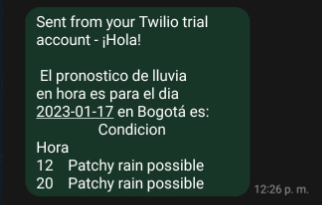